# Clustering dataset presented by Group - 2
**Yogesh Sachdeva - 025041,
Anisha Siwas - 025007,
Tanya Goel - 025034,
Suchit Katyal - 025033,
Sarthak Jain - 025029**


In [1]:
#Hierarchical Clustering Implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading data file
data=pd.read_csv("C:\\Users\\Anisha Siwas\\Downloads\\archive (2)\\Wholesale customers data.csv")

In [3]:
# Head function will tell you the top 5 records of the dataset. By default python shows the top 5 records.
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Tail function will tell you the last 5 records of the dataset
data.tail()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125
439,1,3,2787,1698,2510,65,477,52


In [5]:
#This gives total number of rows and columns in the dataset.
data.shape

(440, 8)

In [6]:
#Finding null values in the dataset.
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

There is no null value in the dataset. 

In [7]:
data["Region"].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

We have 316-3 , 77-1 and 47-2 labelled data

In [8]:
data["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

We have 298-1 and 142-2 labelled data

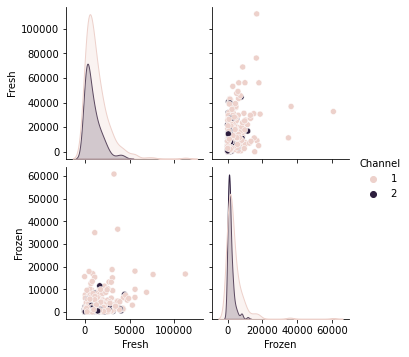

In [9]:
#fresh and frozen features will be used for clustering. Before clustering process let's check  how our data looks.

sns.pairplot(data.loc[:,['Fresh', 'Frozen','Channel']], hue = "Channel")
plt.show()

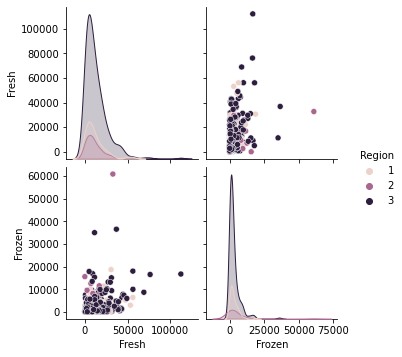

In [10]:
sns.pairplot(data.loc[:,['Fresh','Frozen', 'Region']], hue = "Region")
plt.show()

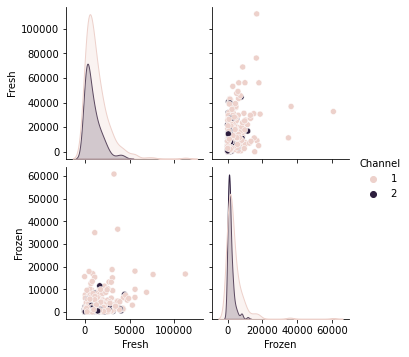

In [11]:
sns.pairplot(data.loc[:,['Fresh','Frozen', 'Channel']], hue = "Channel")
plt.show()

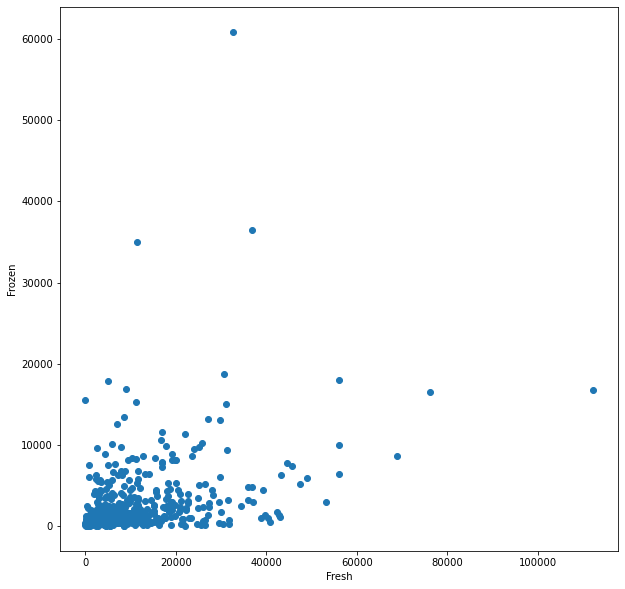

In [12]:
# Our data looks like below plot without diagnosis label

plt.figure(figsize = (10, 10))
plt.scatter(data["Fresh"], data["Frozen"])
plt.xlabel('Fresh')
plt.ylabel('Frozen')
plt.show()

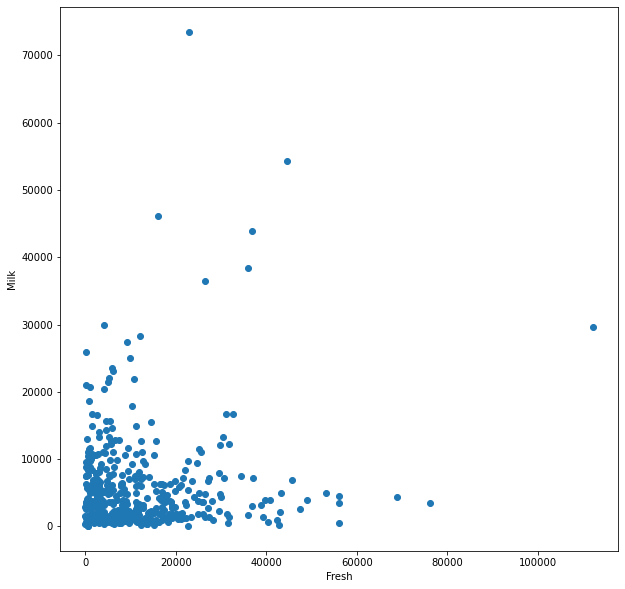

In [13]:
# Our data looks like below plot without diagnosis label

plt.figure(figsize = (10, 10))
plt.scatter(data["Fresh"], data["Milk"])
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()

In [14]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


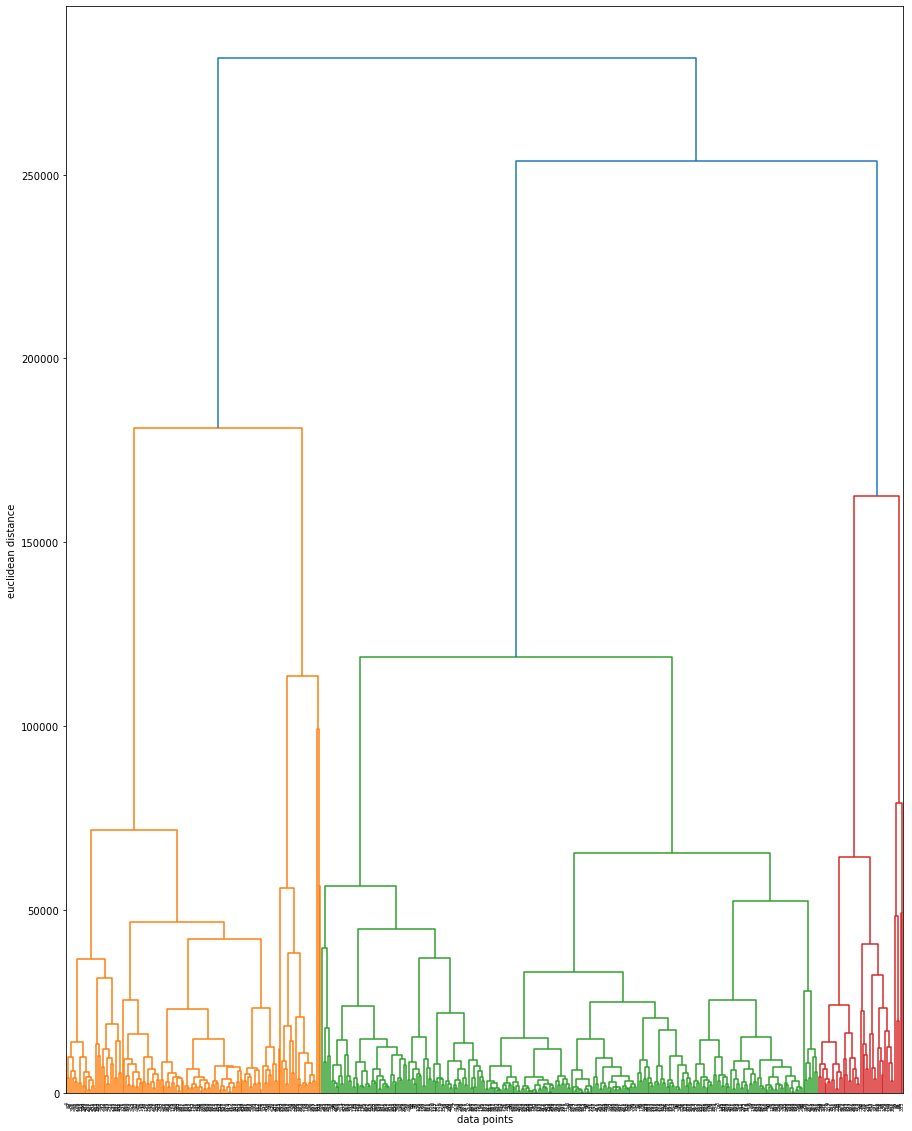

In [15]:
from scipy.cluster.hierarchy import linkage,dendrogram
fig, ax = plt.subplots(figsize=(15, 20))
merg = linkage(data, method = "ward")
ax = dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [16]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(data)
data["label"] = cluster

In [17]:
data.label.value_counts()

0    306
1    134
Name: label, dtype: int64

In [18]:
dataWithoutTypes= data[['Fresh','Frozen']]

In [19]:
dataWithoutTypes.head()

,Fresh,Frozen
0,12669,214
1,7057,1762
2,6353,2405
3,13265,6404
4,22615,3915


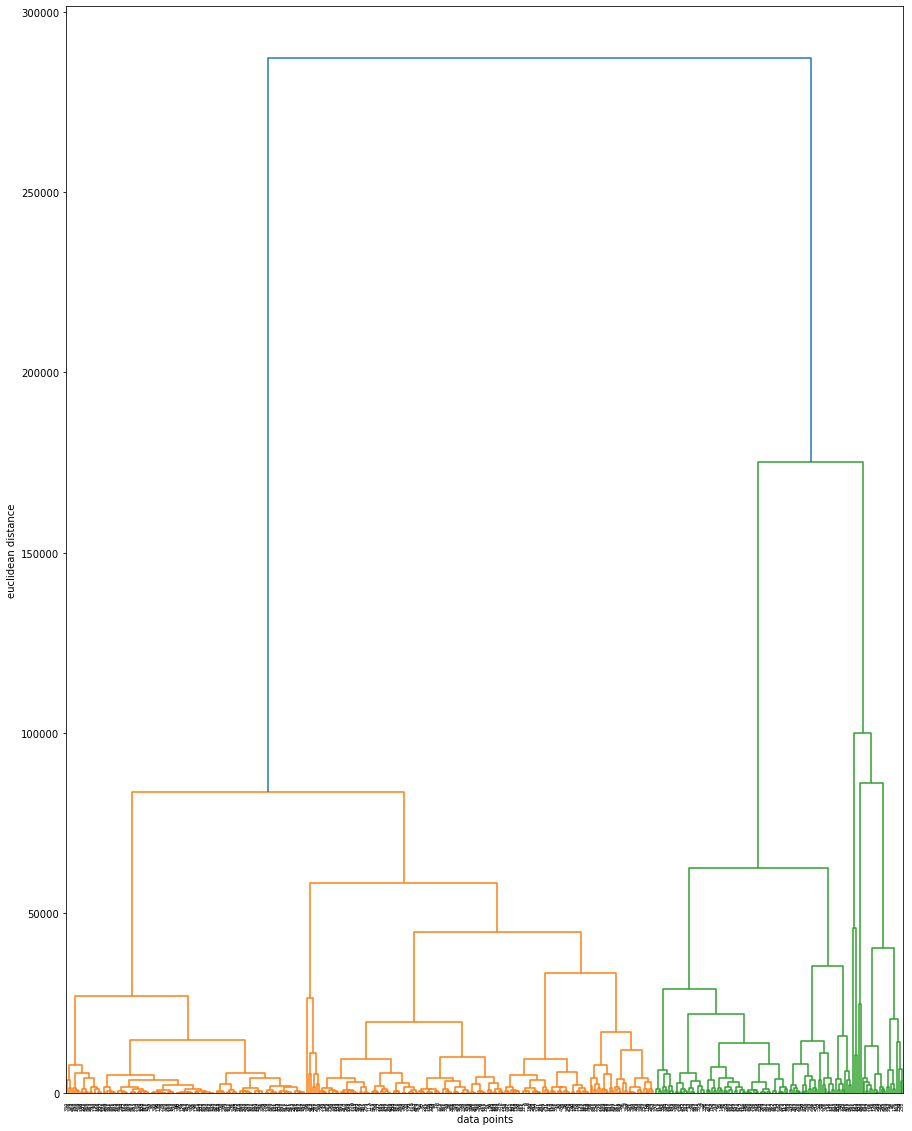

In [20]:
from scipy.cluster.hierarchy import linkage,dendrogram
plt.subplots(figsize=(15, 20))
merg = linkage(dataWithoutTypes, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutTypes)
dataWithoutTypes["label"] = cluster

<ipython-input-21-60fac4c6e0a1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWithoutTypes["label"] = cluster


In [22]:
dataWithoutTypes.label.value_counts()

1    309
0    131
Name: label, dtype: int64

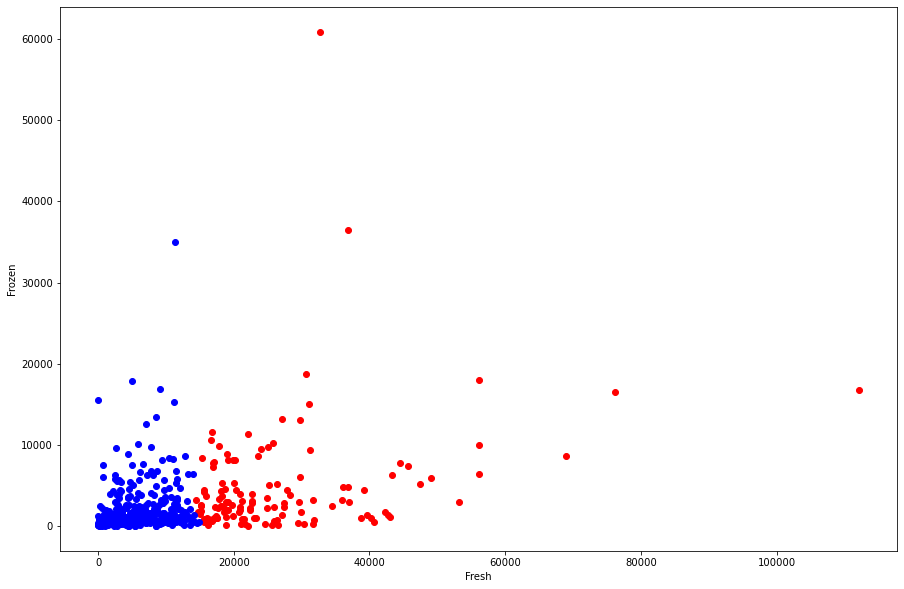

In [23]:
# Data after hierarchical clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutTypes["Fresh"][dataWithoutTypes.label == 0], dataWithoutTypes["Frozen"][dataWithoutTypes.label == 0], color = "red")
plt.scatter(dataWithoutTypes["Fresh"][dataWithoutTypes.label == 1], dataWithoutTypes["Frozen"][dataWithoutTypes.label == 1], color = "blue")
plt.xlabel("Fresh")
plt.ylabel("Frozen")
plt.show()

In [24]:
#Calculate each category sale region wise.
data_reg=data.groupby('Region',as_index=False)[['Fresh','Milk', 'Grocery','Frozen','Detergents_Paper','Delicassen']].agg(np.sum)
data_reg.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,854833,422454,570037,231026,204136,104327
1,2,464721,239144,433274,190132,173311,54506
2,3,3960577,1888759,2495251,930492,890410,512110


In [25]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
data=data_reg.drop("Region",axis=1)

In [26]:
scaler.fit(data)

StandardScaler()

In [27]:
X_scaled_array = scaler.transform(data)
X_scaled_array

array([[-0.57872691, -0.57930951, -0.63322771, -0.64607566, -0.66003463,
        -0.58209395],
       [-0.8281366 , -0.82761888, -0.77849664, -0.76642978, -0.7531566 ,
        -0.82514072],
       [ 1.40686351,  1.40692839,  1.41172435,  1.41250544,  1.41319122,
         1.40723467]])

In [28]:
data_scaled = pd.DataFrame(X_scaled_array, columns = data.columns)

#print (data_scaled.sample(5))
print (data_scaled.head(5))

      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicassen
0 -0.578727 -0.579310 -0.633228 -0.646076         -0.660035   -0.582094
1 -0.828137 -0.827619 -0.778497 -0.766430         -0.753157   -0.825141
2  1.406864  1.406928  1.411724  1.412505          1.413191    1.407235


In [29]:
#Function to scale the data to equilvalent Z-scores
def scale(x):
    return (x-np.mean(x))/np.std(x)
data=data_reg.drop("Region",axis=1)
#data_scaled=data_reg.apply(scale,axis=1)

In [30]:
data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,854833,422454,570037,231026,204136,104327
1,464721,239144,433274,190132,173311,54506
2,3960577,1888759,2495251,930492,890410,512110


In [31]:
data_scaled=data.apply(scale,axis=1)

In [32]:
data_scaled.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.791249,0.096618,0.675043,-0.653649,-0.759039,-1.150222
1,1.412820,-0.137731,1.196662,-0.474625,-0.590248,-1.406879
2,1.843382,0.092262,0.604875,-0.717674,-0.751551,-1.071294


In [33]:
#Alternate to perform scaling using in-built function
from scipy.cluster.hierarchy import dendrogram, linkage

In [34]:
data_scaled=np.array(data_scaled)

In [35]:
#Ward Linkage With Ward's linkage method, the distance between two clusters is the sum of squared deviations from points to centroids. 
#The objective of Ward's linkage is to minimize the within-cluster sum of squares.
Z=linkage(data_scaled,method="ward")

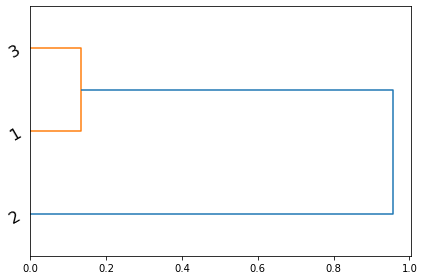

In [36]:
#Plot a Dendogram
ax=dendrogram(Z,orientation="right",labels=np.array(data_reg['Region']),leaf_rotation=30,leaf_font_size=16)
plt.tight_layout()
plt.show()